In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/SpanishWine/wines_SPA.csv')

* winery: Winery name
* wine: Name of the wine
* year: Year in which the grapes were harvested
* rating: Average rating given to the wine by the users [from 1-5]
* num_reviews: Number of users that reviewed the wine
* country: Country of origin [Spain]
* region: Region of the wine
* price: Price in euros [€]
* type: Wine variety
* body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]
* acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

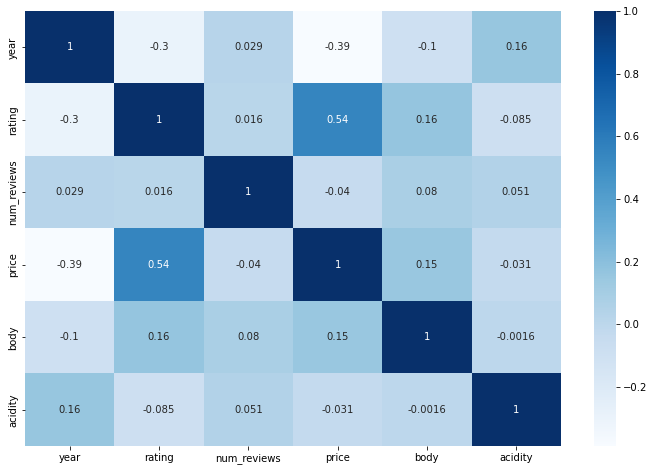

In [3]:
vintages_df = df.drop(df[df['year'] == 'N.V.'].index)
vintages_df = vintages_df[~vintages_df.year.isnull()]
vintages_df['year'] = vintages_df.year.astype('int32')
plt.figure(figsize=(12,8))
sns.heatmap(vintages_df.corr(),cmap='Blues', annot=True)
plt.show()

In [4]:
df['region_wine_count'] = df.groupby('region')['region'].transform('count')
df.sort_values(by='region_wine_count',ascending=False)
_ = df
mask = df['region_wine_count'] < 50
_ = _[~mask]
_['region_avg'] = _.groupby('region')['rating'].transform('mean')
_.region.value_counts()
top_14_regions = _[['region', 'region_avg']].drop_duplicates().sort_values('region_avg',ascending=False)

C:\Users\Charles\AppData\Local\Temp\ipykernel_16536\2903400815.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _['region_avg'] = _.groupby('region')['rating'].transform('mean')


Text(0.5, 1.0, 'Highest AVG Rating by Region')

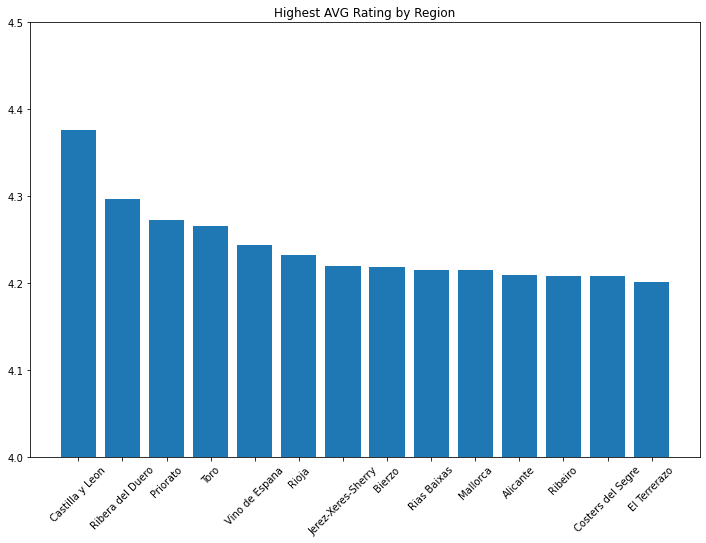

In [5]:
plt.figure(figsize=(12,8))
plt.bar(list(range(0,14)), top_14_regions['region_avg'])
plt.xticks(list(range(0,14)),labels=list(top_14_regions['region']), rotation=45)
plt.ylim(4,4.5)
plt.title('Highest AVG Rating by Region')

#### Violin/Boxplot of top 14 Regions

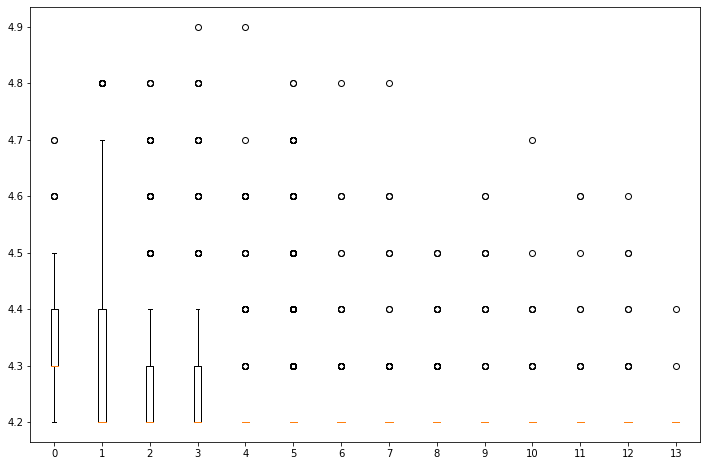

In [6]:
plt.figure(figsize=(12,8))
for idx, i in enumerate(list(top_14_regions['region'])):
    plt.boxplot(_[_['region']==i]['rating'], positions=[idx])
plt.show()

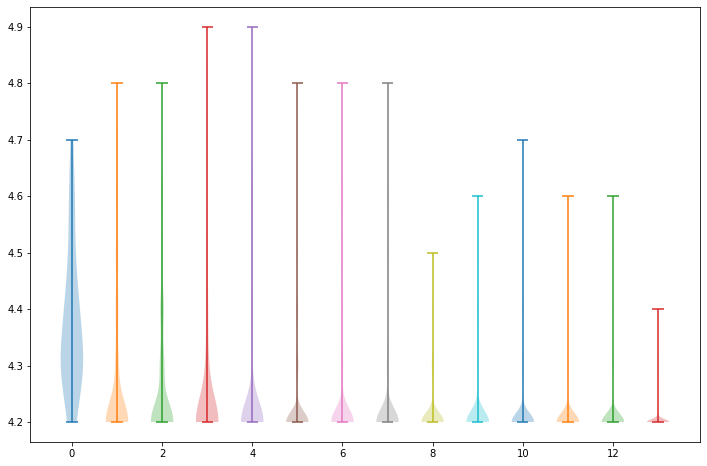

In [7]:
plt.figure(figsize=(12,8))
for idx, i in enumerate(list(top_14_regions['region'])):
    plt.violinplot(_[_['region']==i]['rating'], positions=[idx])
plt.show()

In [8]:
_[_['region'] == 'El Terrerazo']['rating'].value_counts()

4.2    220
4.4      1
4.3      1
Name: rating, dtype: int64

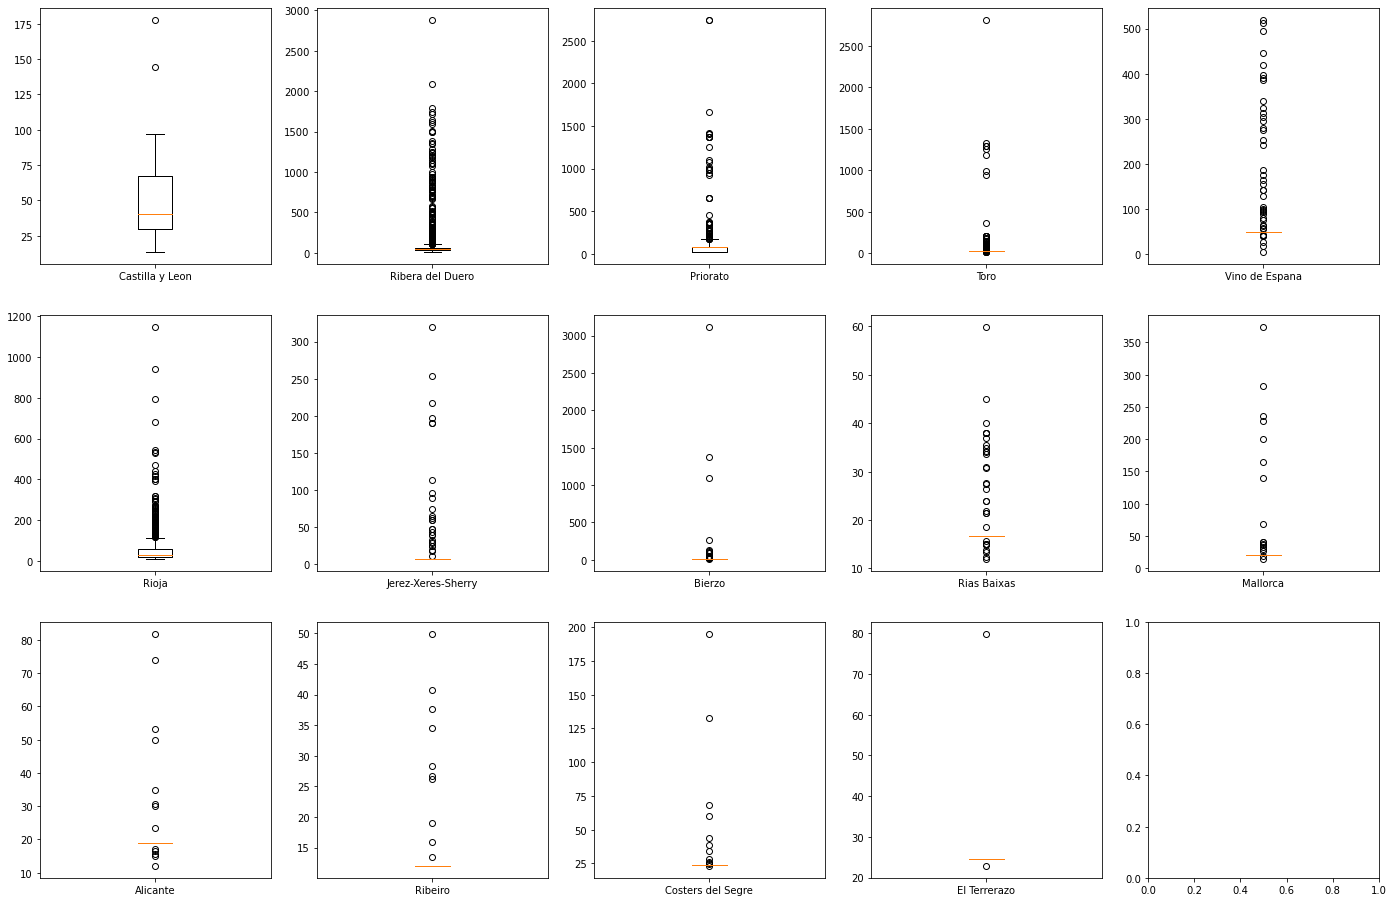

<Figure size 864x576 with 0 Axes>

In [9]:
fig, axs = plt.subplots(3, 5, figsize=(24,16))
ax = axs.flatten()
plt.figure(figsize=(12,8))
for idx, i in enumerate(list(top_14_regions['region'])):
    ax[idx].boxplot(df[df['region']==i]['price'], positions=[idx], labels=[i])
plt.show()

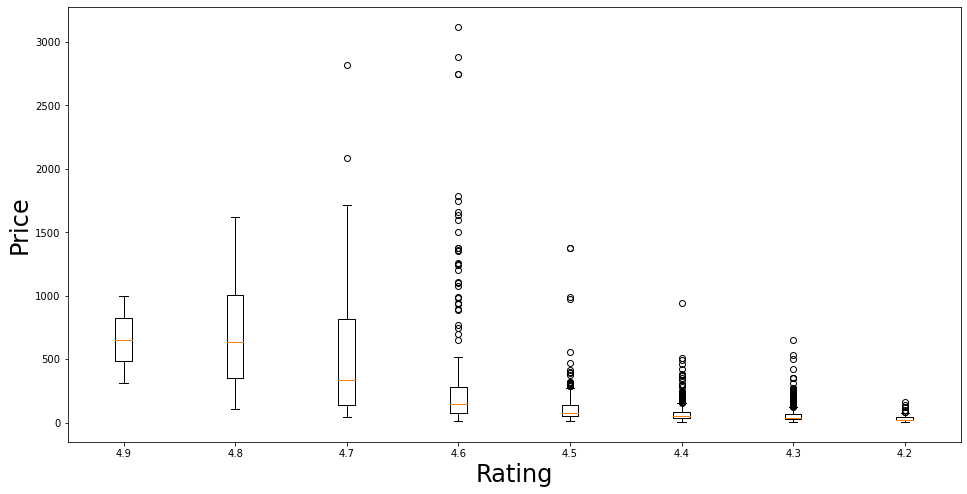

In [29]:
plt.figure(figsize=(16,8))
for idx, i in enumerate(list(df['rating'].drop_duplicates())):
    plt.boxplot(df[df['rating']==i]['price'], positions=[idx], labels=[i])
    plt.xlabel('Rating', fontsize=24)
    plt.ylabel('Price', fontsize=24)
plt.show()
# sns.boxplot(x=df['rating'], y=df['price'])

In [ ]:
plt.figure(figsize=(12,8))
for idx, i in enumerate(list(df['rating'].drop_duplicates())):
    plt.boxplot(df[df['rating']==i]['price'], positions=[idx], labels=[i])
    plt.xlabel('Rating', fontsize=24)
    plt.ylabel('Price', fontsize=24)
plt.show()0

In [25]:
enumerate(list(df['rating'].drop_duplicates()))

## Other

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(top_14_regions['region_avg']).reshape(-1,1))
scaler.transform(np.array(top_14_regions['region_avg']).reshape(-1,1))

array([[ 2.90375318],
       [ 1.188337  ],
       [ 0.66673586],
       [ 0.51753612],
       [ 0.04503813],
       [-0.19407659],
       [-0.4781244 ],
       [-0.50828296],
       [-0.57188635],
       [-0.5785932 ],
       [-0.69328849],
       [-0.70936275],
       [-0.72025965],
       [-0.86752589]])

(array([[10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 3.,  4.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]]),
 array([0.0, 244.0, 488.0, 732.0, 976.0, 1220.0, 1464.0, 1708.0, 1952.0,
        2196.0, 2440.0], dtype=object),
 <a list of 2 BarContainer objects>)

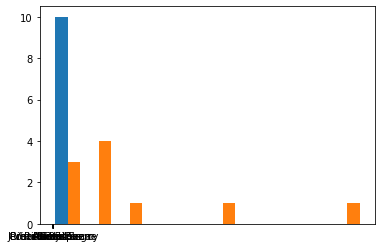

In [12]:
top_10_regions = df[['region', 'type']].groupby('region').count()['type'].nlargest(10)
out = plt.hist(top_10_regions.reset_index())
out

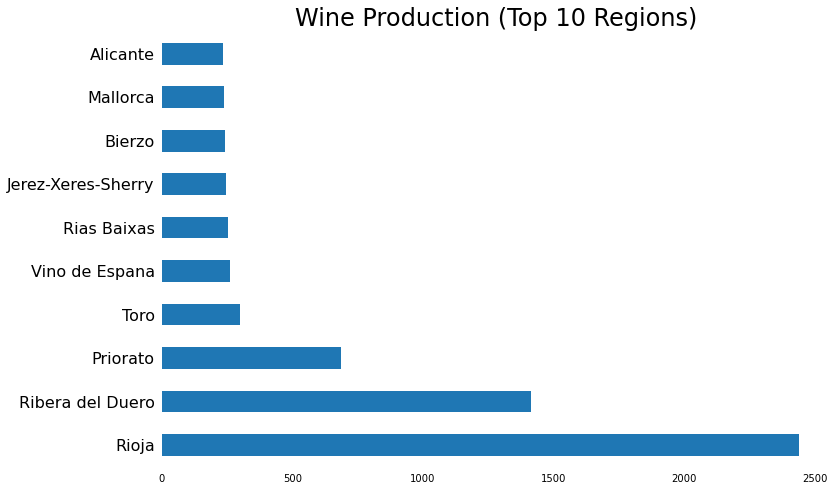

In [13]:
plt.figure(figsize=(12,8))
df['region'].value_counts(ascending=False).head(10).plot(kind='barh')
plt.yticks(fontsize=16)
plt.title('Wine Production (Top 10 Regions)', fontsize=24)
plt.box(False)
plt.tick_params(left=False, bottom=False)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   winery             7500 non-null   object 
 1   wine               7500 non-null   object 
 2   year               7498 non-null   object 
 3   rating             7500 non-null   float64
 4   num_reviews        7500 non-null   int64  
 5   country            7500 non-null   object 
 6   region             7500 non-null   object 
 7   price              7500 non-null   float64
 8   type               6955 non-null   object 
 9   body               6331 non-null   float64
 10  acidity            6331 non-null   float64
 11  region_wine_count  7500 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 703.2+ KB


In [15]:
region_list = list(df['region'].value_counts().nlargest(10).index)
df.query(f'region in {region_list}').groupby(['region', 'type']).count().iloc[:, 0]

region              type                
Alicante            Red                      228
Bierzo              Mencia                   235
                    Red                        3
Jerez-Xeres-Sherry  Pedro Ximenez              7
                    Sherry                   239
Mallorca            Red                       16
Priorato            Priorat Red              674
                    Red                        2
Rias Baixas         Albarino                 251
Ribera del Duero    Ribera Del Duero Red    1406
                    Tempranillo                4
                    Verdejo                    1
Rioja               Grenache                   5
                    Red                        2
                    Rioja Red               2339
                    Rioja White               90
                    Tempranillo                4
Toro                Red                        1
                    Tempranillo                1
                    Toro Red

In [16]:
top_10_regions

region
Rioja                 2440
Ribera del Duero      1411
Priorato               676
Toro                   299
Vino de Espana         263
Rias Baixas            251
Jerez-Xeres-Sherry     246
Bierzo                 238
Costers del Segre      229
Alicante               228
Name: type, dtype: int64

In [17]:
_ = df.groupby(['region']).count()
mask = _['type'] != 0
_[mask]
group = df.groupby(['region', 'type'])['type']
pd.DataFrame(group.count())

type
region         type             
Alella         Sparkling       1
               Syrah           1
Alicante       Red           228
Almansa        Grenache        3
               Red             4
...                          ...
Vino de Espana Syrah           1
               Tempranillo   258
               Verdejo         1
Yecla          Monastrell      7
               Red             1

[121 rows x 1 columns]

In [18]:
df.wine.sample(5)

5173     Preludio
6391        Mirto
3991     El Viejo
7159    Corimbo I
5827       Roc Nu
Name: wine, dtype: object

In [19]:
print(df.nunique())
print(df.info())

winery                480
wine                  847
year                   71
rating                  8
num_reviews           817
country                 1
region                 76
price                1292
type                   21
body                    4
acidity                 3
region_wine_count      35
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   winery             7500 non-null   object 
 1   wine               7500 non-null   object 
 2   year               7498 non-null   object 
 3   rating             7500 non-null   float64
 4   num_reviews        7500 non-null   int64  
 5   country            7500 non-null   object 
 6   region             7500 non-null   object 
 7   price              7500 non-null   float64
 8   type               6955 non-null   object 
 9   body               6331 non-null   

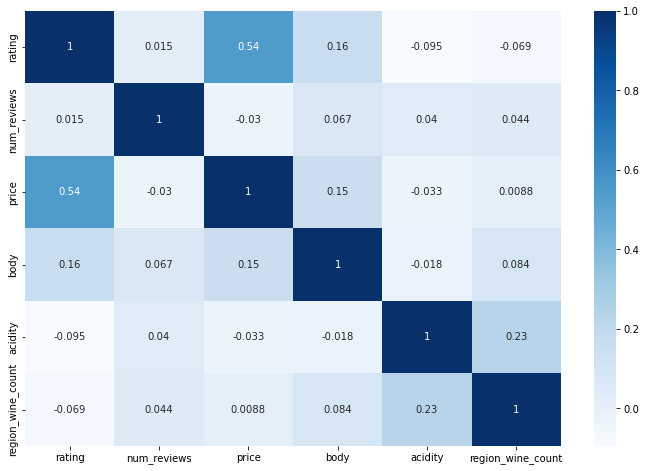

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues', annot=True)
plt.show()

In [21]:
# wineries with best one-off ratings
# Pandas without groupby
threshold = df.rating.nlargest(5).min()
df.query(f'rating >= {threshold}').groupby('winery').rating.max()
# with groupby
group = df.groupby('winery')
_ = group.max('rating')
threshold = _.rating.nlargest(5).min()
one_off_top = _.query(f'rating >= {threshold}').sort_values('rating', ascending=False)
one_off_top

,rating,num_reviews,price,body,acidity,region_wine_count
winery,,,,,,
Artadi,4.9,442,519.550000,4.0,3.0,2440
Teso La Monja,4.9,1178,1325.000000,5.0,3.0,300
Alvaro Palacios,4.8,1016,2750.000000,4.0,3.0,2440
Bodegas El Nido,4.8,3089,371.780098,4.0,3.0,26
Bodegas Valduero,4.8,1645,999.000000,5.0,3.0,1413
Descendientes de J. Palacios,4.8,100,3119.080000,4.0,3.0,244
Dominio de Pingus,4.8,6163,1785.960000,5.0,3.0,1413
La Rioja Alta,4.8,10273,292.090000,4.0,3.0,2440
Ordonez,4.8,665,369.050000,5.0,3.0,300


In [22]:
# Wineries with best avg ratings
# Plain pandas
wineries = df.copy()
wineries = wineries.merge(df.groupby('winery')['wine'].count().reset_index(), on='winery', suffixes=('','_count'))
_df = wineries.groupby(['winery', 'year']).count().sort_values(by='wine', ascending=False)['wine_count']

In [23]:
wineries

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,region_wine_count,wine_count
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0,300,17
1,Teso La Monja,Tinto,2012,4.8,56,Espana,Toro,1190.00,Toro Red,5.0,3.0,300,17
2,Teso La Monja,Tinto,2009,4.8,50,Espana,Toro,950.00,Toro Red,5.0,3.0,300,17
3,Teso La Monja,Tinto,2011,4.8,32,Espana,Toro,1295.00,Toro Red,5.0,3.0,300,17
4,Teso La Monja,Tinto,2015,4.8,28,Espana,Toro,1289.44,Toro Red,5.0,3.0,300,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN,237,220
7496,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN,237,220
7497,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN,237,220
7498,Binigrau,Nounat,2020,4.2,404,Espana,Mallorca,19.90,NaN,NaN,NaN,237,220


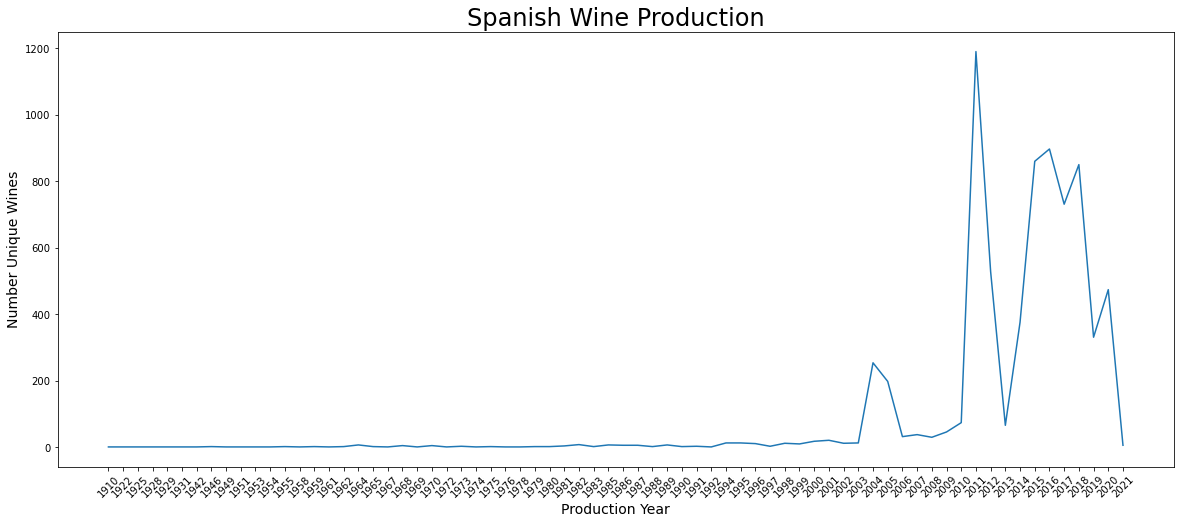

In [24]:
plt.figure(figsize=(20,8))
plt.plot(df.groupby('year').agg('count')['wine'].drop('N.V.'))

plt.ylabel('Number Unique Wines',fontsize=14)
plt.xlabel('Production Year', fontsize=14)
plt.xticks(rotation=45)
plt.title('Spanish Wine Production', fontsize=24)
plt.show()

In [ ]:
plt.scatter(